In [1]:
import pickle
import numpy as np
import utility as utl
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def rolling_corr(data, window):
    start = 0
    corr_series = np.empty([data.shape[0]-window, data.shape[1], data.shape[1]])
    while start+window < data.shape[0]:
        data_window = data.iloc[start:start+window]
        corr_series[start, :, :] = np.corrcoef(data_window, rowvar=0)
        start += 1
    return corr_series

In [3]:
stocklist = 'nyse'
std_threshold = 0.2
window = 50

In [4]:
symbols, prices, dates = pickle.load(open("data/" + stocklist + "-prices.pkl", "rb"))
corr_series = utl.rolling_corr(prices, window)
corr_std = np.std(corr_series, 0)
upper_tri_idx = np.triu_indices(corr_std.shape[0])
corr_std[upper_tri_idx] = np.NaN
indices = np.where(corr_std < std_threshold)

	 corr std(CPG, BTE): 0.14129


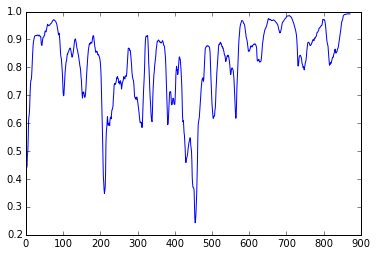

	 corr std(NE, ESV): 0.14111


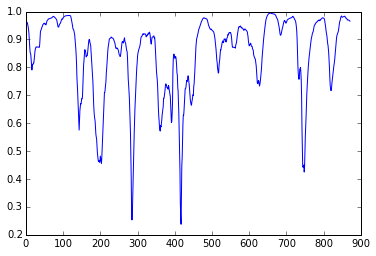

	 corr std(RIG, ESV): 0.19733


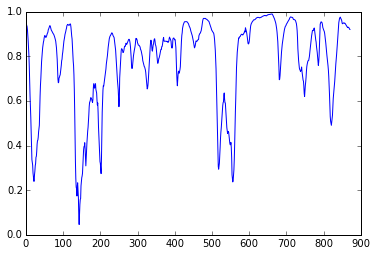

	 corr std(RIG, NE): 0.18184


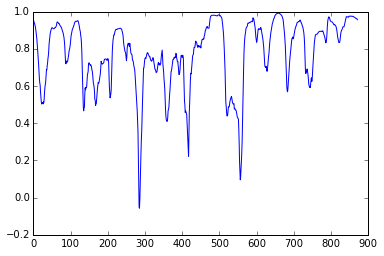

In [14]:
for i in range(0, len(indices[0])):
    j1 = indices[0][i]
    j2 = indices[1][i]
    ticker1 = symbols[j1]
    ticker2 = symbols[j2]
    print("\t corr std(%s, %s): %.5f" % (ticker1, ticker2, corr_std[j1,j2]))
    corr_stocks = pd.Series(corr_series[:, j1, j2], index=dates[window:])
    plt.plot(corr_stocks)
    plt.show()